In [3]:
# Explore Data

In [4]:
import os
import numpy as np

In [5]:
from os.path import join

# change this to the folder that contain detections.npz and grid_tracker_params.npz
folder = "data"
params_path = join(folder, "grid_tracker_params.npz")
detections_path = join(folder, "detections.npz")
out_path = join(folder, "out.npz")

In [6]:
params = np.load(params_path)
detections = np.load(detections_path)
output = np.load(out_path)

In [7]:
params.files

['state_kernel',
 'obsv_kernel',
 'prior_state',
 'x_kernel',
 'y_kernel',
 'log_lls']

In [8]:
detections.files

['index', 'data']

In [9]:
output.files

['data', 'index', 'width', 'height', 'tracks']

In [10]:
detections["index"].shape

(36000,)

In [11]:
detections["index"]

array([(1.61849992e+09, [    0,     2]), (1.61849992e+09, [    2,     4]),
       (1.61849992e+09, [    4,     6]), ...,
       (1.61850112e+09, [55390, 55390]), (1.61850112e+09, [55390, 55390]),
       (1.61850112e+09, [55390, 55391])],
      dtype=[('timestamp', '<f8'), ('range', '<u8', (2,))])

In [12]:
detections["data"].shape

(55391,)

In [13]:
detections["data"]

array([([ 24.421907,  34.50065 ], [[ 2.173688  ,  1.2931849 ], [ 1.2931849 ,  2.8738244 ]], [ 0.02702939,  0.3586082 ], [[ 0.06879816, -0.02993658], [-0.02993658,  0.05610925]]),
       ([ 13.701492,  50.911354], [[ 2.077875  ,  0.9683807 ], [ 0.9683807 ,  8.262921  ]], [ 0.01452453,  0.26610956], [[ 0.13325399, -0.02663071], [-0.02663071,  0.04099663]]),
       ([ 24.421907,  34.50065 ], [[ 2.173688  ,  1.2931849 ], [ 1.2931849 ,  2.8738244 ]], [ 0.01008072,  0.36689773], [[ 0.0563441 , -0.02547308], [-0.02547308,  0.04617493]]),
       ...,
       ([103.87072 ,  24.21665 ], [[ 0.77599907, -0.21475671], [-0.21475671,  1.3486593 ]], [-0.7020594 ,  0.1759263 ], [[ 0.0555849 , -0.02611777], [-0.02611777,  0.03787723]]),
       ([ 96.19066 ,  26.419077], [[ 3.2241185 , -4.5633836 ], [-4.5633836 ,  8.670851  ]], [ 0.17105146, -0.36694247], [[ 0.08621818,  0.00861586], [ 0.00861586,  0.057647  ]]),
       ([103.90408 ,  24.145878], [[ 0.77289945, -0.212784  ], [-0.212784  ,  1.33997   ]], [

In [14]:
detections["data"]["pos"].shape

(55391, 2)

In [15]:
detected_positions = detections["data"]["pos"]
detected_positions

array([[ 24.421907,  34.50065 ],
       [ 13.701492,  50.911354],
       [ 24.421907,  34.50065 ],
       ...,
       [103.87072 ,  24.21665 ],
       [ 96.19066 ,  26.419077],
       [103.90408 ,  24.145878]], dtype=float32)

In [16]:
xs = detected_positions[:,0]
ys = detected_positions[:,1]

xs.min(), xs.max(), ys.min(), ys.max()

(1.4884994, 109.58469, 0.032696385, 83.15179)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

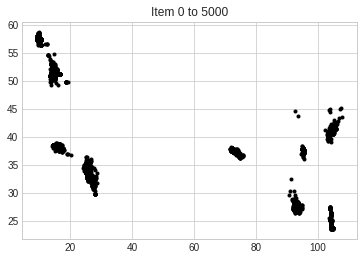

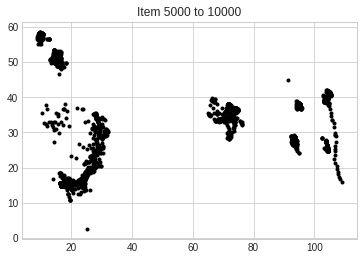

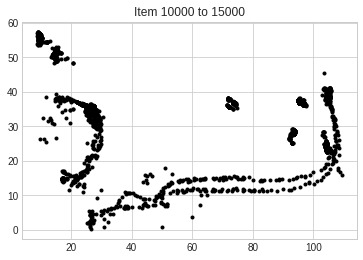

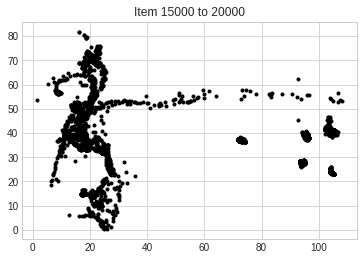

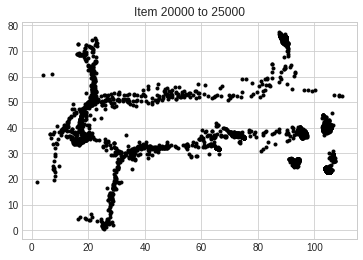

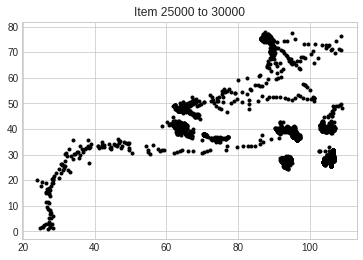

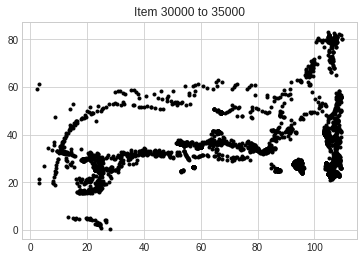

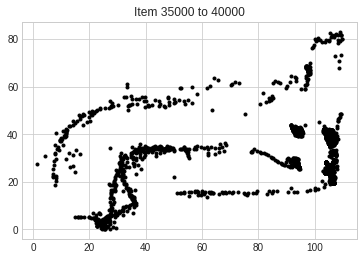

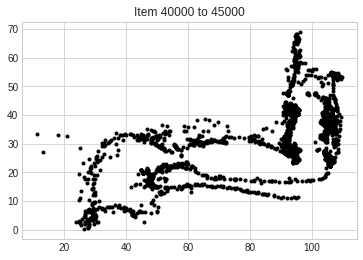

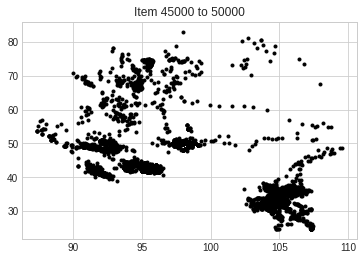

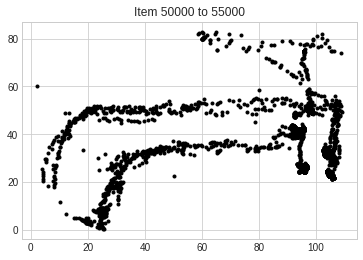

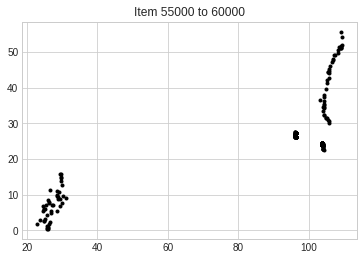

In [18]:
chunksize = 5000
i = 0
while i < len(xs):
    fig, ax = plt.subplots(1,1)
    xx = xs[i:i+chunksize]
    yy = ys[i:i+chunksize]
    plt.title(f"Item {i} to {i+chunksize}")
    ax.plot(xx, yy, '.', color='black');
    i += chunksize


In [19]:
output["index"]

array([(1.61849992e+09, [    0,     2]), (1.61849992e+09, [    2,     4]),
       (1.61849992e+09, [    4,     6]), ...,
       (1.61850112e+09, [55390, 55390]), (1.61850112e+09, [55390, 55390]),
       (1.61850112e+09, [55390, 55391])],
      dtype=[('timestamp', '<f8'), ('range', '<u8', (2,))])

In [20]:
np.array_equal(output["index"], detections["index"])

True

In [21]:
output["data"]

array([(  1,        nan, [ 24.421907,  34.50065 ], [[ 2.173688  ,  1.2931849 ], [ 1.2931849 ,  2.8738244 ]], [ 0.02702939,  0.3586082 ], [[ 0.06879816, -0.02993658], [-0.02993658,  0.05610925]]),
       (  2,        nan, [ 13.701492,  50.911354], [[ 2.077875  ,  0.9683807 ], [ 0.9683807 ,  8.262921  ]], [ 0.01452453,  0.26610956], [[ 0.13325399, -0.02663071], [-0.02663071,  0.04099663]]),
       (  1, 0.00447427, [ 24.421907,  34.50065 ], [[ 2.173688  ,  1.2931849 ], [ 1.2931849 ,  2.8738244 ]], [ 0.01008072,  0.36689773], [[ 0.0563441 , -0.02547308], [-0.02547308,  0.04617493]]),
       ...,
       (601, 0.04001778, [103.87072 ,  24.21665 ], [[ 0.77599907, -0.21475671], [-0.21475671,  1.3486593 ]], [-0.7020594 ,  0.1759263 ], [[ 0.0555849 , -0.02611777], [-0.02611777,  0.03787723]]),
       (602, 0.03840675, [ 96.19066 ,  26.419077], [[ 3.2241185 , -4.5633836 ], [-4.5633836 ,  8.670851  ]], [ 0.17105146, -0.36694247], [[ 0.08621818,  0.00861586], [ 0.00861586,  0.057647  ]]),
       (

In [22]:
# class (ID) of the detected object
output["data"]["id"]

array([  1,   2,   1, ..., 601, 602, 601], dtype=int32)

In [23]:
no_classes = output["data"]["id"].max()
no_classes

602

In [24]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(no_classes)

# TODO how to use this?

In [25]:
# log likelihood of the assignment?
output["data"]["ll"]

array([       nan,        nan, 0.00447427, ..., 0.04001778, 0.03840675,
       0.1491401 ], dtype=float32)

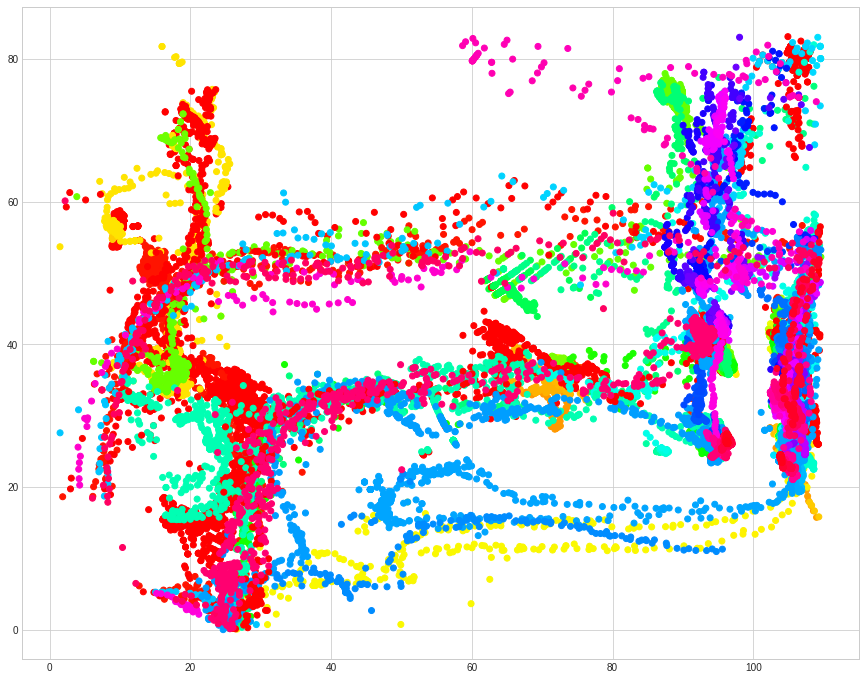

In [26]:
out_pos = output["data"]["pos"]
out_heading = output["data"]["heading"]
out_id = output["data"]["id"]
out_ll = output["data"]["ll"]

class_colors = [cmap(i) for i in range(no_classes)]
out_id_colors = [class_colors[x-1] for x in out_id]

xs = out_pos[:, 0]
ys = out_pos[:, 1]

plt.figure(figsize=(15, 12))
plt.scatter(xs, ys, c=out_id_colors)

In [27]:
output["width"]

array(116)

In [28]:
output["height"]

array(84)

In [29]:
output["tracks"]

array([(  2, 1.61849992e+09, [ 13.720335,  50.914825], 1, [ 7.3341675e-02,  9.9726784e-01]),
       (  1, 1.61849992e+09, [ 24.44075 ,  34.50412 ], 1, [ 5.1222667e-02,  9.9865878e-01]),
       (  2, 1.61849992e+09, [ 13.668569,  50.922127], 1, [-1.8136078e-04,  9.9996227e-01]),
       ...,
       (592, 1.61850111e+09, [103.98702 ,  24.10915 ], 1, [-9.8341399e-01,  1.8130247e-01]),
       (592, 1.61850111e+09, [103.988754,  24.106155], 1, [-9.8203403e-01,  1.8863370e-01]),
       (592, 1.61850111e+09, [103.989456,  24.103342], 1, [-9.8088235e-01,  1.9453345e-01])],
      dtype=[('id', '<i4'), ('timestamp', '<f8'), ('pos', '<f4', (2,)), ('gap', '<i4'), ('heading', '<f4', (2,))])

In [30]:
out_tracks = output["tracks"]
len(out_tracks)

39103

In [31]:
out_tracks["pos"]

array([[ 13.720335,  50.914825],
       [ 24.44075 ,  34.50412 ],
       [ 13.668569,  50.922127],
       ...,
       [103.98702 ,  24.10915 ],
       [103.988754,  24.106155],
       [103.989456,  24.103342]], dtype=float32)

In [32]:
out_tracks["gap"]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [33]:
out_tracks["gap"].min(), out_tracks["gap"].max()

(1, 138)

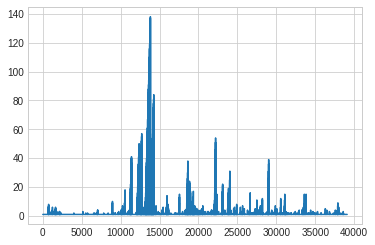

In [34]:
plt.plot(out_tracks["gap"])